In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [17]:
data=load_diabetes()

In [18]:
print(data.DESCR)  # description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [19]:
x=data.data # extract input cols
y=data.target # extract output cols

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import Ridge

In [22]:
r=Ridge(alpha=0.01)  # default 1

In [23]:
r.fit(x_train,y_train)

Ridge(alpha=0.01)

In [24]:
y_pred=r.predict(x_test)

In [25]:
from sklearn.metrics import r2_score,root_mean_squared_error
print("r2_score ",r2_score(y_test,y_pred))
print("RMSE_score ",root_mean_squared_error(y_test,y_pred))

r2_score  0.4559819504579108
RMSE_score  53.68696471589739


In [26]:
x=6*np.random.rand(100,1) -3
y=0.7*x**2 + 1.3*x + 2 + np.random.randn(100,1)

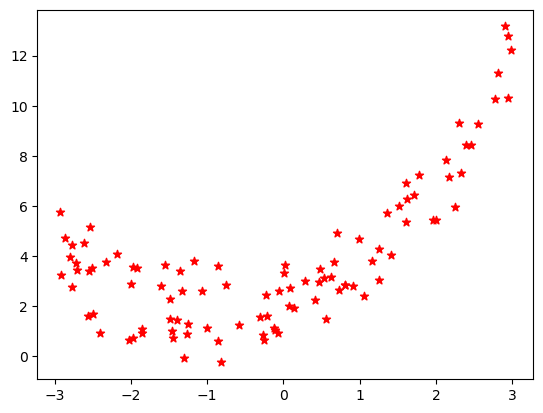

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='r',marker='*')
plt.show()

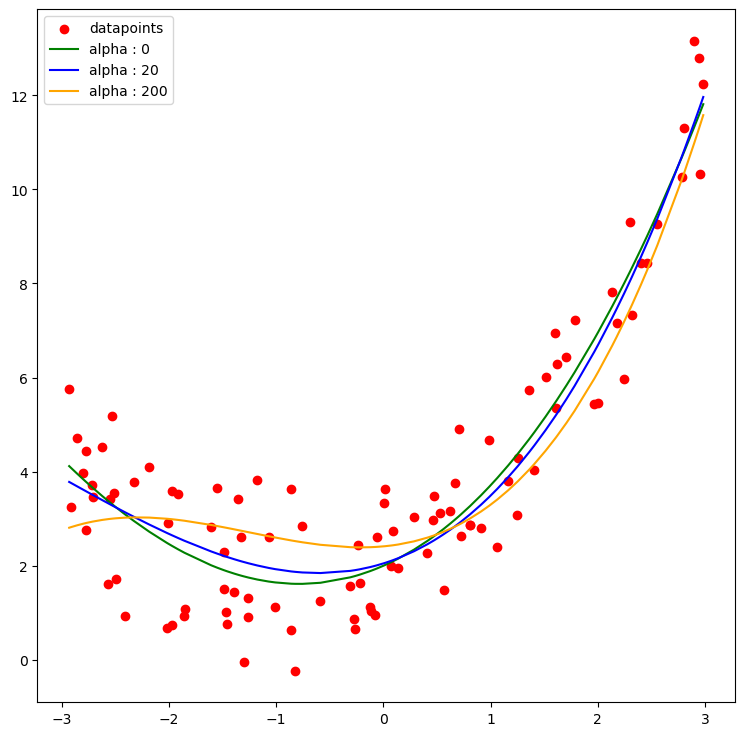

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_ridge_pred(x,y,alpha):
    model=Pipeline([
        ("polynomial_features",PolynomialFeatures(degree=3)),
        ("ridge_regression",Ridge(alpha=alpha))
    ])
    model.fit(x,y)
    return model.predict(x)
alphas=[0,20,200]
cs=['g','b','orange']
plt.figure(figsize=(9,9))
plt.scatter(x,y,color='r',label='datapoints')

for alpha,c in zip(alphas,cs):
    preds=get_ridge_pred(x,y,alpha)
    plt.plot(sorted(x[:,0]),preds[np.argsort(x[:,0])],c,label="alpha : {}".format(alpha))
plt.legend()
plt.show()    